In [1]:
#loading the data set
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train:  (50000, 32, 32, 3)


In [6]:
std=0.1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print(Ntr)
batch_size = Ntr

iterations =  300
lr = 0.9e-2
lr_decay=0.999
reg = 5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    x = x_train[indices]
    y = y_train[indices]
    y_pred = x.dot(w1) + b1
    # Forward pass
    loss = 1./batch_size*np.square(y_pred-y).sum() + reg* np.sum(w1*w1)
    loss_history.append(loss)
    if t%10==0:
        print('Epoches %d / %d: loss %f' % (t, iterations, loss))
    # Backward pass
    dy_pred=1./batch_size*2.0*(y_pred-y)
    dw1=x.T.dot(dy_pred) + reg*w1
    db1=dy_pred.sum(axis=0)
    w1 -= lr*dw1
    b1 -= lr*db1
    lr *=lr_decay



w1: (3072, 10)
b1: (10,)
50000
Epoches 0 / 300: loss 0.999999
Epoches 10 / 300: loss 0.896808
Epoches 20 / 300: loss 0.865003
Epoches 30 / 300: loss 0.844867
Epoches 40 / 300: loss 0.831054
Epoches 50 / 300: loss 0.821283
Epoches 60 / 300: loss 0.814229
Epoches 70 / 300: loss 0.809044
Epoches 80 / 300: loss 0.805162
Epoches 90 / 300: loss 0.802199
Epoches 100 / 300: loss 0.799893
Epoches 110 / 300: loss 0.798060
Epoches 120 / 300: loss 0.796574
Epoches 130 / 300: loss 0.795345
Epoches 140 / 300: loss 0.794309
Epoches 150 / 300: loss 0.793419
Epoches 160 / 300: loss 0.792643
Epoches 170 / 300: loss 0.791957
Epoches 180 / 300: loss 0.791342
Epoches 190 / 300: loss 0.790786
Epoches 200 / 300: loss 0.790277
Epoches 210 / 300: loss 0.789809
Epoches 220 / 300: loss 0.789376
Epoches 230 / 300: loss 0.788972
Epoches 240 / 300: loss 0.788594
Epoches 250 / 300: loss 0.788238
Epoches 260 / 300: loss 0.787903
Epoches 270 / 300: loss 0.787587
Epoches 280 / 300: loss 0.787286
Epoches 290 / 300: loss

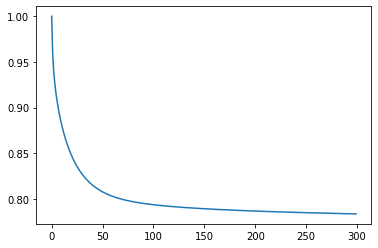

In [3]:
plt.plot(loss_history)

In [4]:
# Printing accuracies
x_t=x_train
y_pred=x_t.dot(w1)+b1
train_acc= 1.0 - 1/Ntr*(np.abs(np.argmax(y_train,axis=1) - np.argmax(y_pred,axis=1))).sum()
print("train_acc - ",train_acc)

x_t=x_test
y_pred=x_t.dot(w1)+b1
test_acc= 1.0 - 1/Nte*(np.abs(np.argmax(y_test,axis=1) - np.argmax(y_pred,axis=1))).sum()
print("test_acc - ",test_acc)

train_acc -  -1.2030600000000002
test_acc -  -1.2578


In [35]:
seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(3):
    indices = np.arange(5)
    rng.shuffle(indices)
    x=x_train[indices]
    y=y_train[indices]
    print(len(indices))
    print(x,x.shape)
    print(y,y.shape)

5
[[ 0.48740888  0.46644652  0.4801812  ... -0.18289836 -0.15627569
  -0.11914455]
 [ 0.15407553  0.17232886  0.25665176 ... -0.21034934 -0.1915698
  -0.13483082]
 [-0.4027872  -0.43551427 -0.48060313 ... -0.2142709  -0.23862863
  -0.26816416]
 [-0.2812186  -0.29041624 -0.27276    ... -0.0142709  -0.13274628
  -0.16620338]
 [ 0.09133043  0.16056415  0.2135145  ...  0.06416047  0.02803804
   0.11614957]] (5, 3072)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]] (5, 10)
5
[[ 0.15407553  0.17232886  0.25665176 ... -0.21034934 -0.1915698
  -0.13483082]
 [ 0.09133043  0.16056415  0.2135145  ...  0.06416047  0.02803804
   0.11614957]
 [ 0.48740888  0.46644652  0.4801812  ... -0.18289836 -0.15627569
  -0.11914455]
 [-0.2812186  -0.29041624 -0.27276    ... -0.0142709  -0.13274628
  -0.16620338]
 [-0.4027872  -0.43551427 -0.48060313 ... -0.2142709  -0.23862863
  -0.26816416]] (5

In [ ]:
# displaying w as images #not completed
f,axarr=plt.subplots(1,10)
f.set_size_inches(16,6)
for i in range(10):
    img=w1[:,i].reshape(32,32,3)
    axarr[i].imshow(img*1000)
plt.show